# Random Forest Regression

 Importing used libraries:

In [170]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 6)
plt.rcParams['figure.figsize'] = [20.0,8.0]
plt.rcParams['figure.dpi']=80

Loading dataset:

In [171]:
df = pd.read_csv("dataset/preprocessed_train_PCA.csv")
print('Dataset has been loaded correctly')

Dataset has been loaded correctly


In [172]:
print('(examples,columns)')
df.shape

(examples,columns)


(433958, 49)

selecting useful features:

In [173]:
print('Categorical attributes are dropped because we consider for the analysis the "One Hot Encoding" version.')
df = df.drop(['Unnamed: 0','StoreType','AssortmentType','Events'], axis=1)

Categorical attributes are dropped because we consider for the analysis the "One Hot Encoding" version.


### Attributes kept:

In [174]:
df.head().T

,0,1,2,3,4
StoreID,1000,1000,1000,1000,1000
Date,01/03/2016,02/03/2016,04/03/2016,05/03/2016,07/03/2016
IsHoliday,0,0,0,0,0
HasPromotions,0,0,0,0,1
NearestCompetitor,326,326,326,326,326
Region,7,7,7,7,7
NumberOfCustomers,495,608,665,630,763
NumberOfSales,5676,8111,8300,7154,10110
Region_AreaKM2,9643,9643,9643,9643,9643
Region_GDP,17130,17130,17130,17130,17130


The attributes identified by "px" where x goes from 1 to 12 are the components obtained performing PCA on several attributes. 
You can check the whole PCA notebook looking at "3.4_Prepr_train_PCA".

In [175]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import validation_curve

Loading train and test set:

In [176]:
import modify_dataset as md

test_months = (1, 2)
test_year = 2017

train = md.get_fake_train(df, test_months, test_year)
test = md.get_fake_test(df, test_months, test_year)

print('df.shape    ', df.shape)
print('train.shape ', train.shape)
print('test.shape  ', test.shape)

y_train = train['NumberOfSales']
y_test = test['NumberOfSales']

df.shape     (433958, 45)
train.shape  (397455, 45)
test.shape   (36503, 45)


# Feature selection on the train set:

In [177]:
features = list(train.columns.values)
features.remove('NumberOfSales')
features.remove('NumberOfCustomers')

features.remove('StoreID')
#features.remove('D_Year')
features.remove('Date')
features.remove('D_DayOfweek')
features.remove('Min_VisibilitykM')
features.remove('Max_VisibilityKm')
#features.remove('AssortmentType_WithFishDept')
#features.remove('StoreType_StandardMarket')
#features.remove('AssortmentType_General')
features.remove('MeanRegionSales')
features.remove('MeanCustomers')
features.remove('MeanStoreSales')
features.remove('MeanRegionCustomers')
print("features")

print(features)

features
['IsHoliday', 'HasPromotions', 'NearestCompetitor', 'Region', 'Region_AreaKM2', 'Region_GDP', 'Region_PopulationK', 'CloudCover', 'WindDirDegrees', 'D_Day', 'D_DayOfYear', 'D_Month', 'D_Year', 'StoreType_SuperMarket', 'StoreType_HyperMarket', 'StoreType_StandardMarket', 'StoreType_ShoppingCenter', 'AssortmentType_General', 'AssortmentType_WithNFDept', 'AssortmentType_WithFishDept', 'D_DayOfWeek_cos', 'D_DayOfWeek_sin', 'p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9', 'p10', 'p11', 'p12']


In [178]:
train.shape

(397455, 45)

In [179]:
train[features].head().T

,0,1,2,3,4
IsHoliday,0.000000,0.000000,0.000000,0.000000,0.000000
HasPromotions,0.000000,0.000000,0.000000,0.000000,1.000000
NearestCompetitor,326.000000,326.000000,326.000000,326.000000,326.000000
Region,7.000000,7.000000,7.000000,7.000000,7.000000
Region_AreaKM2,9643.000000,9643.000000,9643.000000,9643.000000,9643.000000
Region_GDP,17130.000000,17130.000000,17130.000000,17130.000000,17130.000000
Region_PopulationK,2770.000000,2770.000000,2770.000000,2770.000000,2770.000000
CloudCover,8.000000,8.000000,8.000000,6.000000,0.000000
WindDirDegrees,23.000000,56.000000,22.000000,108.000000,68.000000
D_Day,1.000000,2.000000,4.000000,5.000000,7.000000


# Model Building 

In [180]:
from sklearn.ensemble import RandomForestRegressor

In [181]:
model1 = RandomForestRegressor(n_estimators=30, max_depth=20, n_jobs=-1, verbose=2)

In [182]:

model1.fit(train[features], train['NumberOfCustomers'])

building tree 1 of 30
building tree 2 of 30building tree 3 of 30
building tree 4 of 30

building tree 5 of 30
building tree 6 of 30
building tree 7 of 30
building tree 8 of 30
building tree 9 of 30
building tree 10 of 30
building tree 11 of 30
building tree 12 of 30
building tree 13 of 30
building tree 14 of 30
building tree 15 of 30
building tree 16 of 30
building tree 17 of 30
building tree 18 of 30
building tree 19 of 30
building tree 20 of 30
building tree 21 of 30
building tree 22 of 30
building tree 23 of 30
building tree 24 of 30
building tree 25 of 30
building tree 26 of 30
building tree 27 of 30
building tree 28 of 30
building tree 29 of 30
building tree 30 of 30


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.3min finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=-1,
           oob_score=False, random_state=None, verbose=2, warm_start=False)

Which are the most relevant features?

In [183]:
idx = model1.feature_importances_.argsort()[::-1]

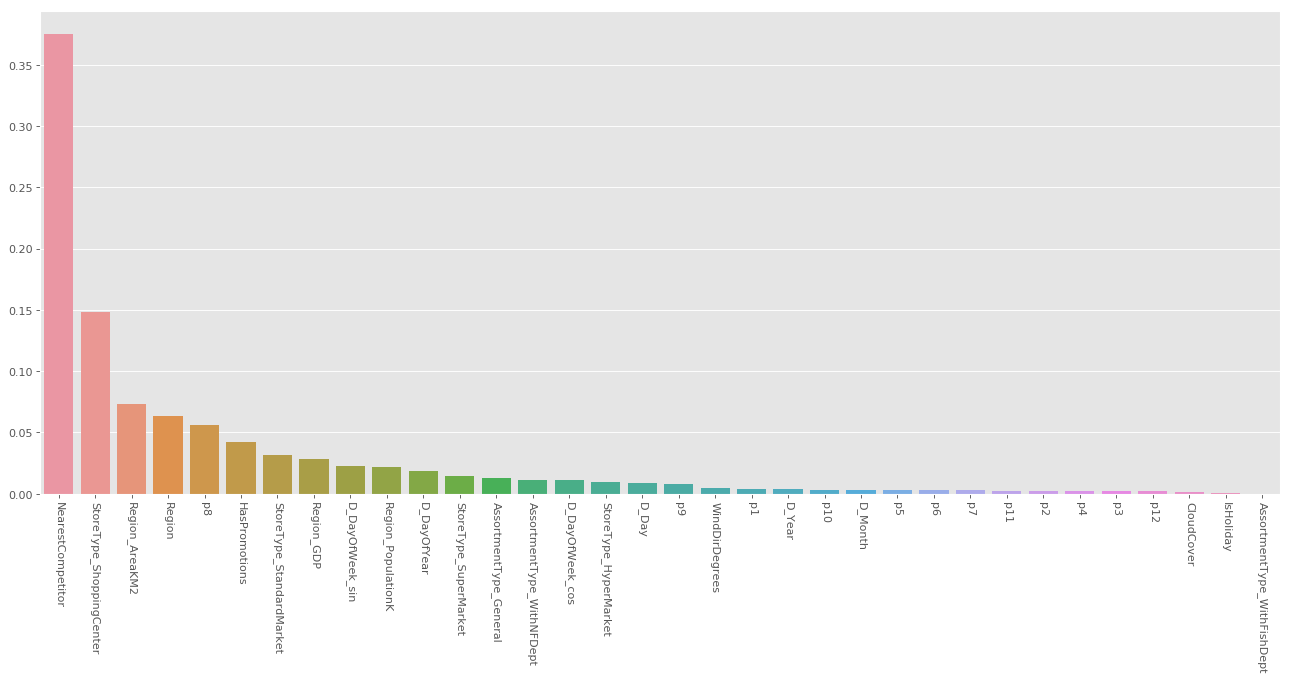

In [184]:
ax = sns.barplot(x=df[features].columns[idx], y=model1.feature_importances_[idx])
_ = plt.setp(ax.get_xticklabels(), rotation=-90)

# Predict

In [185]:
train['NumberOfCustomers'] = model1.predict(train[features])

[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:    0.8s finished
C:\Users\Mirko\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [186]:
test_months = (3, 4)
test_year = 2016

#test = md.get_fake_test(df, test_months, test_year)
#train = md.get_fake_train(df, test_months, test_year)

In [187]:
train.head(3)


,StoreID,Date,IsHoliday,HasPromotions,NearestCompetitor,Region,NumberOfCustomers,NumberOfSales,Region_AreaKM2,Region_GDP,...,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12
0,1000,01/03/2016,0,0,326,7,560.620186,5676,9643,17130,...,-0.000928,-0.000821,-0.002141,0.002836,-0.000841,-0.001263,0.000318,-0.000180,-0.000371,-0.000053
1,1000,02/03/2016,0,0,326,7,565.739468,8111,9643,17130,...,-0.000572,-0.000465,-0.002355,0.003005,0.001131,-0.001301,0.000109,0.000120,-0.000312,0.000174
2,1000,04/03/2016,0,0,326,7,631.268664,8300,9643,17130,...,-0.000510,-0.000580,0.000349,-0.001332,-0.000546,-0.001428,-0.000134,-0.000554,-0.000372,0.000443


In [188]:
test['NumberOfCustomers'] = model1.predict(test[features])

[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:    0.0s finished
C:\Users\Mirko\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [189]:
test.head(3)


,StoreID,Date,IsHoliday,HasPromotions,NearestCompetitor,Region,NumberOfCustomers,NumberOfSales,Region_AreaKM2,Region_GDP,...,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12
253,1000,02/01/2017,0,0,326,7,626.844726,11820,9643,17130,...,0.000565,0.002470,0.000658,-0.000499,0.000451,-0.001304,0.000208,0.000263,0.000054,-0.000021
254,1000,03/01/2017,0,0,326,7,612.671564,4666,9643,17130,...,0.000533,0.002459,0.000657,-0.000585,0.000496,-0.001298,0.000226,0.000196,-0.000185,0.000371
255,1000,05/01/2017,0,0,326,7,603.927860,6761,9643,17130,...,-0.000624,-0.000770,0.000904,-0.000354,-0.000679,-0.001301,0.000280,0.000197,0.000365,0.000243


In [190]:
features.append('NumberOfCustomers')
features

['IsHoliday',
 'HasPromotions',
 'NearestCompetitor',
 'Region',
 'Region_AreaKM2',
 'Region_GDP',
 'Region_PopulationK',
 'CloudCover',
 'WindDirDegrees',
 'D_Day',
 'D_DayOfYear',
 'D_Month',
 'D_Year',
 'StoreType_SuperMarket',
 'StoreType_HyperMarket',
 'StoreType_StandardMarket',
 'StoreType_ShoppingCenter',
 'AssortmentType_General',
 'AssortmentType_WithNFDept',
 'AssortmentType_WithFishDept',
 'D_DayOfWeek_cos',
 'D_DayOfWeek_sin',
 'p1',
 'p2',
 'p3',
 'p4',
 'p5',
 'p6',
 'p7',
 'p8',
 'p9',
 'p10',
 'p11',
 'p12',
 'NumberOfCustomers']

In [191]:
train.head().T

,0,1,2,3,4
StoreID,1000,1000,1000,1000,1000
Date,01/03/2016,02/03/2016,04/03/2016,05/03/2016,07/03/2016
IsHoliday,0,0,0,0,0
HasPromotions,0,0,0,0,1
NearestCompetitor,326,326,326,326,326
Region,7,7,7,7,7
NumberOfCustomers,560.62,565.739,631.269,645.337,754.617
NumberOfSales,5676,8111,8300,7154,10110
Region_AreaKM2,9643,9643,9643,9643,9643
Region_GDP,17130,17130,17130,17130,17130


In [192]:
features.append('MeanRegionSales')

features.append('MeanStoreSales')

## Alternative

In [193]:
test_months = (3, 4)
test_year = 2016

#test = md.get_fake_test(df, test_months, test_year)
#train = md.get_fake_train(df, test_months, test_year)

In [194]:
#features.remove('MeanRegionSales')
#features.remove('NumberOfCustomers')
#features.remove('MeanStoreSales')

In [195]:
#test['NumberOfCustomers'] = model1.predict(test[features])

In [196]:
model2 = RandomForestRegressor(n_estimators=30, max_depth=20, n_jobs=-1, verbose=2)

In [197]:

model2.fit(train[features], train['NumberOfSales'])

building tree 1 of 30
building tree 2 of 30
building tree 3 of 30
building tree 4 of 30
building tree 5 of 30
building tree 6 of 30
building tree 7 of 30
building tree 8 of 30
building tree 9 of 30
building tree 10 of 30
building tree 11 of 30
building tree 12 of 30
building tree 13 of 30
building tree 14 of 30
building tree 15 of 30
building tree 16 of 30
building tree 17 of 30
building tree 18 of 30
building tree 19 of 30
building tree 20 of 30
building tree 21 of 30
building tree 22 of 30
building tree 23 of 30
building tree 24 of 30
building tree 25 of 30
building tree 26 of 30
building tree 27 of 30
building tree 28 of 30
building tree 29 of 30
building tree 30 of 30


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  3.0min finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=-1,
           oob_score=False, random_state=None, verbose=2, warm_start=False)

Which are the most relevant features?

In [198]:
idx = model2.feature_importances_.argsort()[::-1]

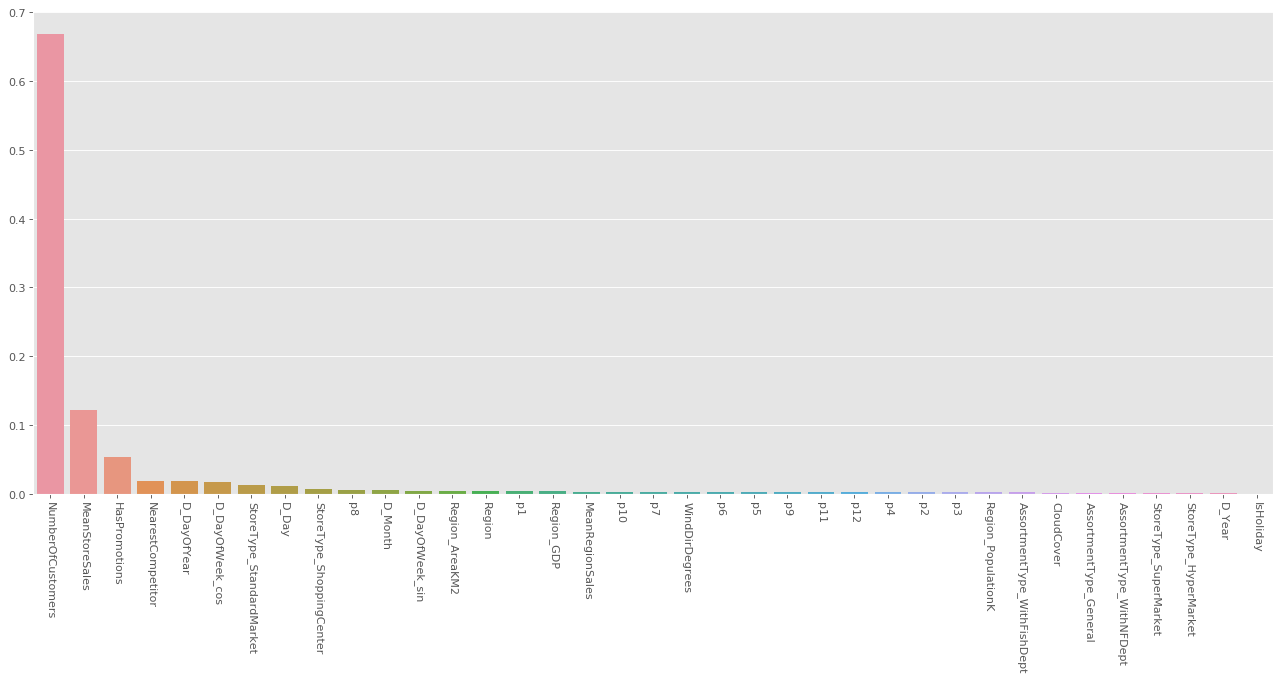

In [199]:
ax = sns.barplot(x=df[features].columns[idx], y=model2.feature_importances_[idx])
_ = plt.setp(ax.get_xticklabels(), rotation=-90)

# Predict

In [200]:
test['_NumberOfSales'] = model2.predict(test[features])

[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:    0.1s finished
C:\Users\Mirko\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [201]:
test.head().T

,253,254,255,256,257
StoreID,1000,1000,1000,1000,1000
Date,02/01/2017,03/01/2017,05/01/2017,06/01/2017,07/01/2017
IsHoliday,0,0,0,0,0
HasPromotions,0,0,0,0,0
NearestCompetitor,326,326,326,326,326
Region,7,7,7,7,7
NumberOfCustomers,626.845,612.672,603.928,611.782,608.83
NumberOfSales,11820,4666,6761,7157,6923
Region_AreaKM2,9643,9643,9643,9643,9643
Region_GDP,17130,17130,17130,17130,17130


In [202]:
from BIP import get_BIP_error
error1 = get_BIP_error(test)

Number of regions identified: 11
BIP total error: 0.03327414966034558
